In [1]:
%load_ext autoreload
%autoreload 2

import os
import sys
import git

import uproot as ut
import awkward as ak
import numpy as np
import math
import vector
import sympy as sp

import re
from tqdm import tqdm
import timeit

sys.path.append( git.Repo('.', search_parent_directories=True).working_tree_dir )
from utils import *

In [2]:
filename = "NanoAOD/NMSSM_XYH_YToHH_6b_MX_700_MY_400_accstudies_500k_Jul2021.root"
tree = Tree(filename)
preselection = Selection(tree,cuts={"njetcut":6},tag="preselection")
print(preselection)
baseline = Selection(tree,include=preselection,tag="baseline")
tree.calc_jet_dr(baseline.jets_selected)
print(baseline)

--- all preselection ---
Event Efficiency:   0.74
Selected Purity(6): 0.29
Passed Jet S/T:     0.69
--- all baseline ---
Event Efficiency:   1.0
Selected Purity(6): 0.29
Passed Jet S/T:     0.69


# Selection

In [16]:
btag_wps = [None]
for wp in [3,2,1,0]: btag_wps.append( Selection(tree,cuts=dict(btagcut=jet_btagWP[wp]),previous=btag_wps[-1],include=baseline,tag=f"{wplabels[wp]} btag",ignore_tag=True) )
btag_wps.pop(0)
btag_wps = list(reversed(btag_wps))

--- all null btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.21


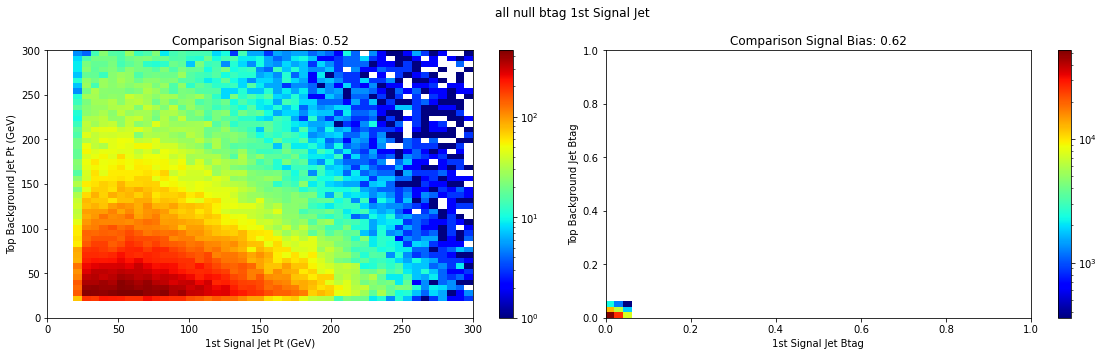

--- all loose btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.65


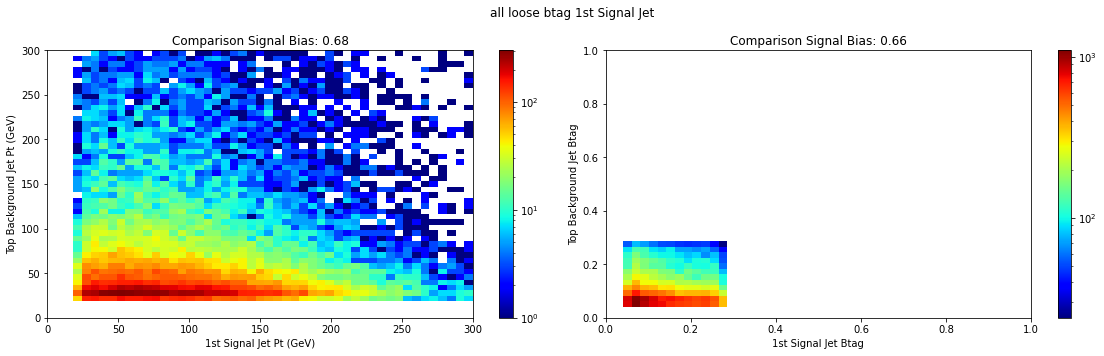

--- all medium btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.89


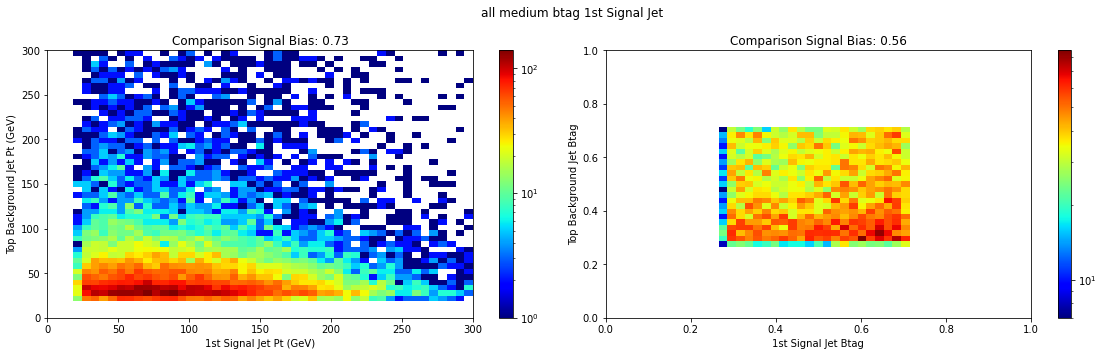

--- all tight btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.02
Passed Jet S/T:     0.94


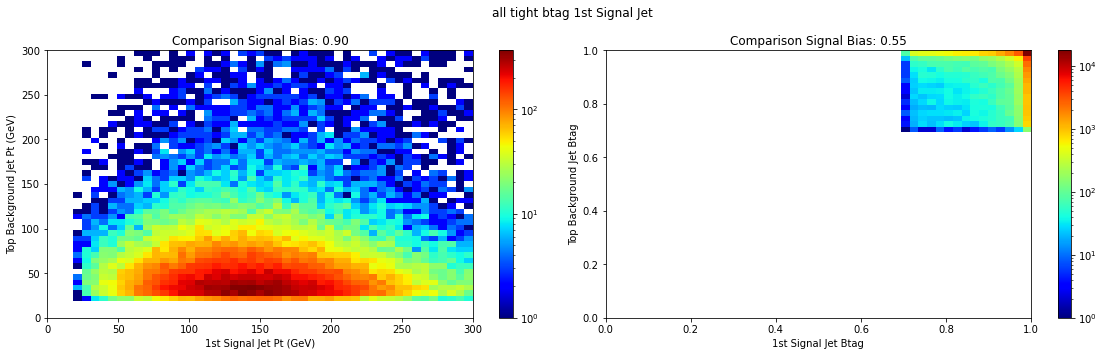

In [17]:
for i,btag_wp in enumerate(btag_wps):
    jets_2d_ordered_study(btag_wp,njets=1,compare=1,saveas=f"{wplabels[i]}_btag")

--- all null btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.21


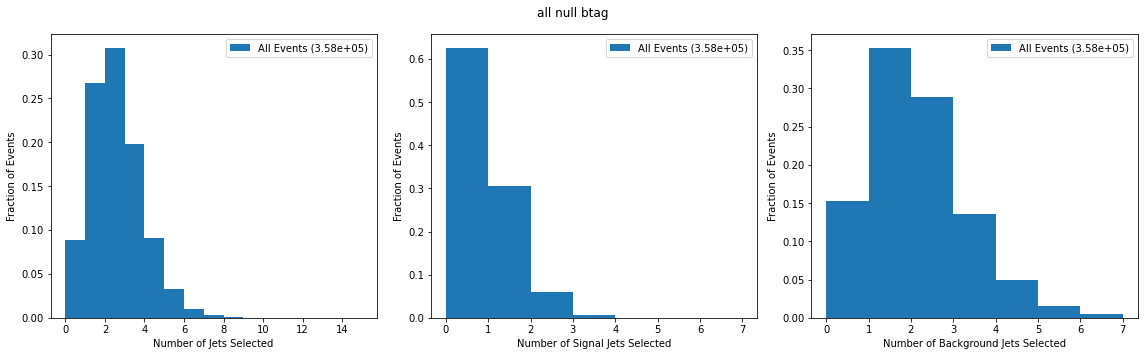

--- all loose btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.65


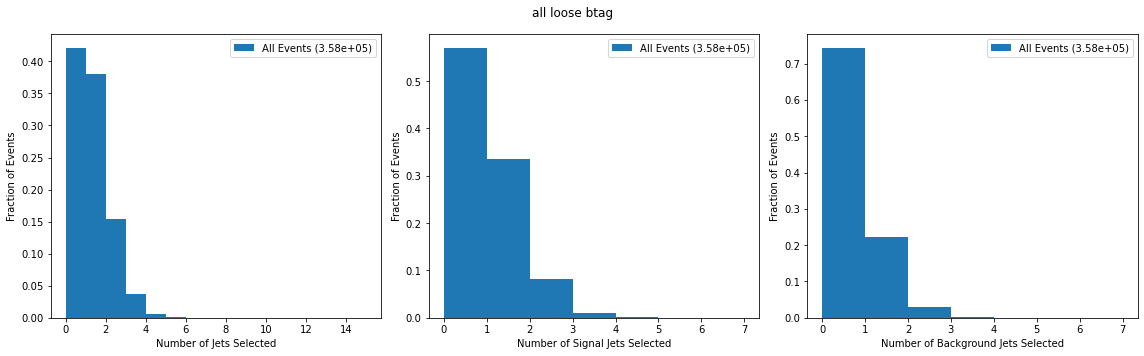

--- all medium btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.00
Passed Jet S/T:     0.89


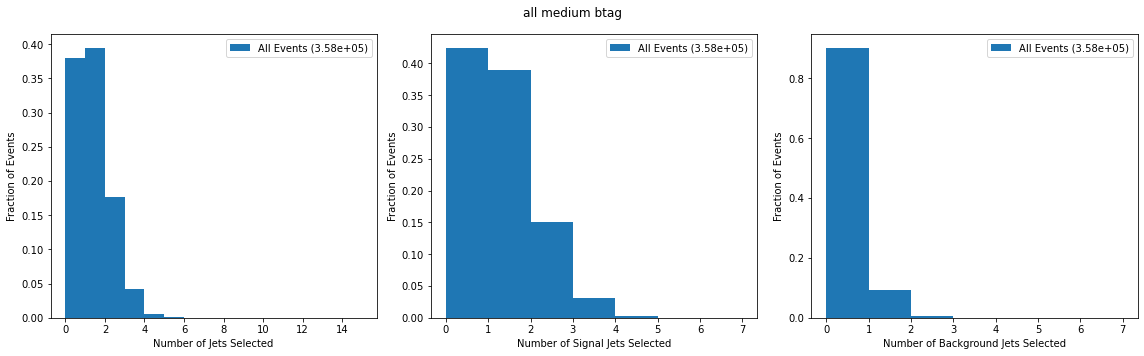

--- all tight btag ---
Event Efficiency:   1.0
Selected Purity(6): 0.02
Passed Jet S/T:     0.94


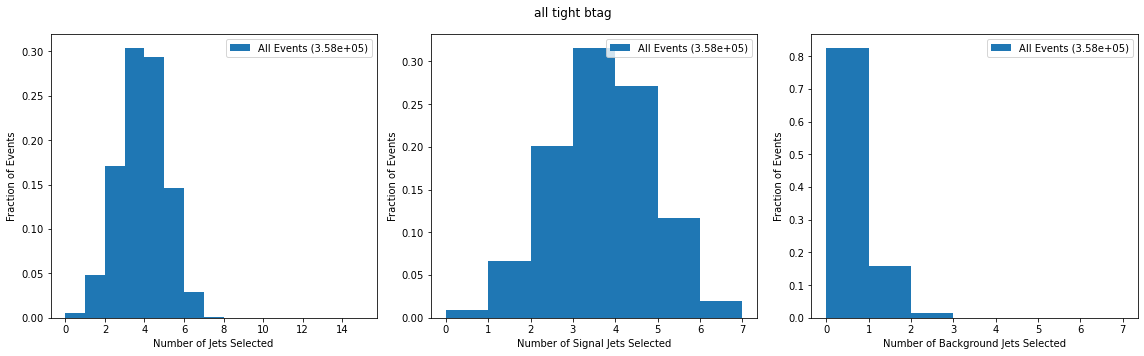

In [20]:
for i,btag_wp in enumerate(btag_wps):
    njet_study(btag_wp,saveas=f"{wplabels[i]}_btag",density=1)

In [10]:
ordered = btag_bias_pt_ordering(tree,baseline)

--- all baseline ---
Event Efficiency:   1.0
Selected Purity(6): 0.29
Passed Jet S/T:     0.69


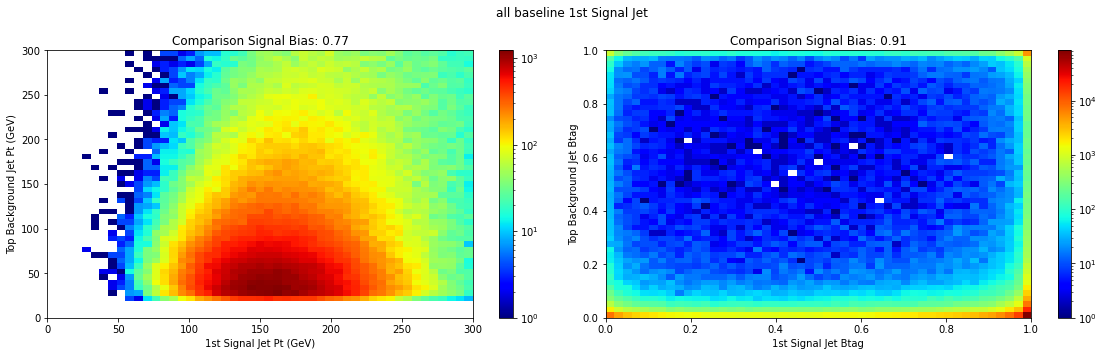

In [11]:
jets_2d_ordered_study(baseline,njets=1,compare=1)

--- all btag bias pt ordered ---
Event Efficiency:   1.0
Selected Purity(6): 0.29
Passed Jet S/T:     0.69


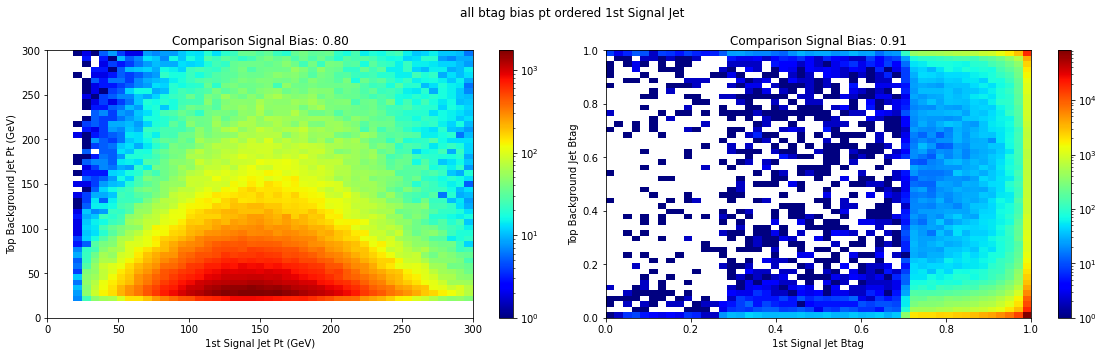

In [12]:
jets_2d_ordered_study(ordered,njets=1,compare=1)